<a href="https://colab.research.google.com/github/Mounikad1/Mounikad/blob/main/Traffic_Signs_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Exploration**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import Layer

## **Custom Feature Engineering Layer**

In [ ]:
import tensorflow as tf

class CustomFeatureLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomFeatureLayer, self).__init__()

        # Define a custom filter for edge detection (3x3 filter, 3 input channels for RGB)
        self.edge_filter = self.add_weight(
            name='edge_filter',
            shape=(3, 3, 3, 1),  # 3x3 filter, 3 input channels, 1 output channel
            initializer=tf.keras.initializers.RandomNormal(),
            trainable=True
        )

    def call(self, inputs):
        # Apply edge detection using the convolution filter
        edge_features = tf.nn.conv2d(inputs, self.edge_filter, strides=[1, 1, 1, 1], padding="SAME")
        return tf.concat([inputs, edge_features], axis=-1)  # Concatenate the original image and edge features

    def compute_output_shape(self, input_shape):
        # The output shape will have an additional channel dimension due to the concatenation
        return (input_shape[0], input_shape[1], input_shape[2], input_shape[3] + 1)



In [ ]:
import os

# List files in the current directory to verify the ZIP file is there
print(os.listdir('/content'))


['.config', 'archive.zip', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = '/content/archive.zip'

# Extract the ZIP file to the current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Extract to /content directory

# List files again to see extracted contents
print(os.listdir('/content'))


['.config', 'Train.csv', 'Train', 'meta', 'train', 'Meta.csv', 'Meta', 'Test', 'archive.zip', 'Test.csv', 'test', '.ipynb_checkpoints', 'sample_data']


In [ ]:
# Initialize lists to store data and labels
data = []
labels = []

# Assuming 'train' is a folder containing images for classification
dataset_path = '/content/Train'  # Change this if your dataset path is different
classes = 43  # Number of traffic sign classes

# Loop through each class folder and load images
for i in range(classes):
    class_path = os.path.join(dataset_path, str(i))
    images = os.listdir(class_path)

    for image_name in images:
        try:
            # Load and resize image
            image = Image.open(os.path.join(class_path, image_name))
            image = image.resize((30, 30))  # Resize to 30x30 (or any other preferred size)
            image = np.array(image)  # Convert image to numpy array

            data.append(image)
            labels.append(i)  # The label for this image is the class number
        except Exception as e:
            print(f"Error loading image {image_name}: {e}")

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


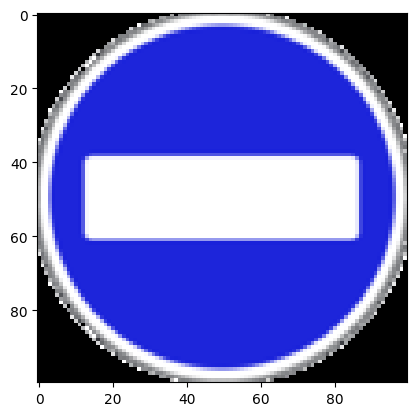

In [ ]:
# Visualize some images from the dataset
img = cv2.imread("/content/Meta/17.png")
plt.imshow(img)

# **Build a CNN model**

In [ ]:
# Model with Custom Feature Engineering
model = Sequential()

# Custom Feature Layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 3)))
model.add(CustomFeatureLayer())

In [ ]:
# CNN Layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# **Train the Model**

In [ ]:
# Train the Model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

# Save the Model
model.save("traffic_classifier_with_custom_features.h5")

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 166s 165ms/step - accuracy: 0.3531 - loss: 2.9359 - val_accuracy: 0.9046 - val_loss: 0.4183
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 203s 166ms/step - accuracy: 0.7969 - loss: 0.6740 - val_accuracy: 0.9550 - val_loss: 0.1793
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 166s 169ms/step - accuracy: 0.8784 - loss: 0.4144 - val_accuracy: 0.9712 - val_loss: 0.1187
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 165s 168ms/step - accuracy: 0.9116 - loss: 0.3124 - val_accuracy: 0.9721 - val_loss: 0.0966
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 161s 164ms/step - accuracy: 0.9180 - loss: 0.2909 - val_accuracy: 0.9744 - val_loss: 0.0849
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 203s 165ms/step - accuracy: 0.9315 - loss: 0.2478 - val_accuracy: 0.9786 - val_loss: 0.0798
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 166s 169ms/step - accuracy: 0.9377 - loss: 0.2184 - val_accuracy: 0.9741 - val_loss: 0.0918
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 203s 170ms/step - accuracy: 0.9407 -

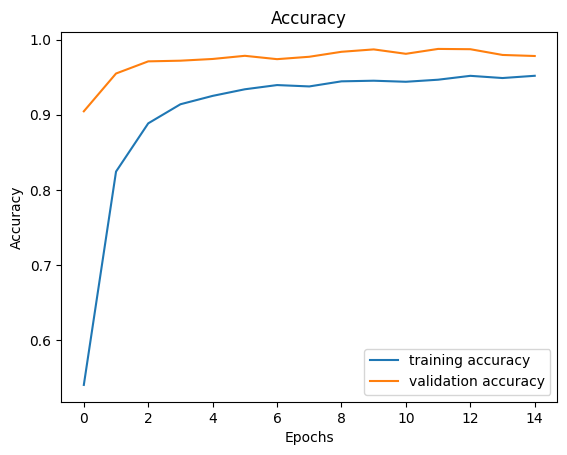

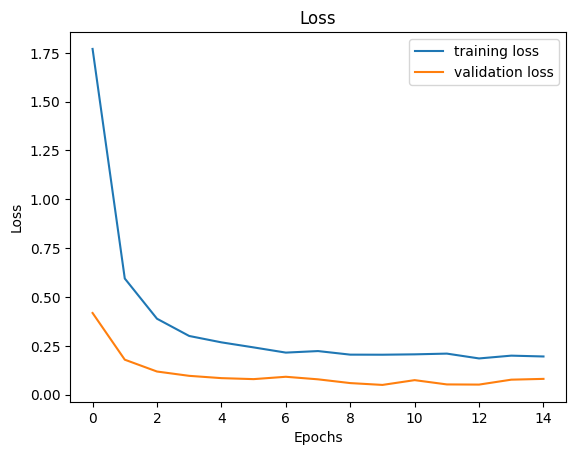

In [ ]:
# Plotting Accuracy and Loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **Test the model with test dataset**

In [ ]:

# Test the Model
y_test_df = pd.read_csv('Test.csv')
labels = y_test_df["ClassId"].values
imgs = y_test_df["Path"].values

# Prepare test data
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)




# Predict classes
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Calculate Accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(labels, pred))


395/395 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step
Test Accuracy: 0.9369754552652415


Upload an image to classify:


Saving 12341.png to 12341.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


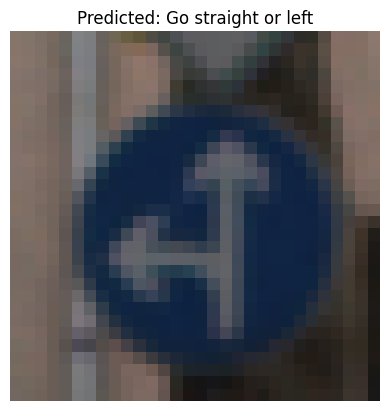

In [ ]:
from google.colab import files
from PIL import Image

# Dictionary to map class IDs to traffic sign names
class_names = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

# Function to predict a single uploaded image
def predict_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).resize((30, 30))  # Resize to match model input size
    image_array = np.array(image).reshape(1, 30, 30, 3)  # Reshape to model input dimensions
    #image_array = image_array / 255.0  # Normalize if necessary

    # Make prediction
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)

    # Get the class name
    class_name = class_names.get(predicted_class, "Unknown Class")

    # Display the result
    plt.imshow(image)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# Allow users to upload an image
print("Upload an image to classify:")
uploaded = files.upload()
for filename in uploaded.keys():
    predict_image(filename)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/drive/My Drive/traffic_classifier_with_custom_features.keras')

